### Load libraries

In [2]:
import dataprep as dp
import torchaudio.transforms as T
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import librosa
from sklearn.model_selection import train_test_split
import os

### Parameters

In [3]:
# general parameters
PATH = "data/ESC-50"


### Instantiate the Dataset object

In [4]:
dataset = dp.ESC50Prep(PATH, 'cpu')

### Data exploration

In [6]:
labels = dataset.class_mapping
labels

{'Hand saw': 0,
 'Fireworks': 1,
 'Airplane': 2,
 'Church bells': 3,
 'Train': 4,
 'Engine': 5,
 'Car horn': 6,
 'Siren': 7,
 'Chainsaw': 8,
 'Helicopter': 9,
 'Glass breaking': 10,
 'Clock tick': 11,
 'Clock alarm': 12,
 'Vacuum cleaner': 13,
 'Washing machine': 14,
 'Can opening': 15,
 'Door - wood creaks': 16,
 'Keyboard typing': 17,
 'Mouse click': 18,
 'Door knock': 19,
 'Drinking - sipping': 20,
 'Snoring': 21,
 'Brushing teeth': 22,
 'Laughing': 23,
 'Footsteps': 24,
 'Coughing': 25,
 'Breathing': 26,
 'Clapping': 27,
 'Sneezing': 28,
 'Crying baby': 29,
 'Thunderstorm': 30,
 'Toilet flush': 31,
 'Pouring water': 32,
 'Wind': 33,
 'Water drops': 34,
 'Chirping birds': 35,
 'Crickets': 36,
 'Crackling fire': 37,
 'Sea waves': 38,
 'Rain': 39,
 'Crow': 40,
 'Sheep': 41,
 'Insects': 42,
 'Hen': 43,
 'Frog': 44,
 'Cat': 45,
 'Cow': 46,
 'Pig': 47,
 'Rooster': 48,
 'Dog': 49}

In [7]:
length = len(dataset)
length

2000

In [6]:
dataset

In [8]:
value_counts = {}
iterator = iter(dataset)
for idx in range(0, length):
    inputs, _, targets = next(iterator)
    if targets in value_counts:
        value_counts[targets] += 1
    else:
        value_counts[targets] = 1

In [9]:
value_counts

{18: 40,
 43: 40,
 35: 40,
 0: 40,
 46: 40,
 1: 40,
 41: 40,
 23: 40,
 25: 40,
 32: 40,
 48: 40,
 37: 40,
 42: 40,
 26: 40,
 17: 40,
 2: 40,
 13: 40,
 31: 40,
 38: 40,
 10: 40,
 24: 40,
 12: 40,
 29: 40,
 33: 40,
 16: 40,
 36: 40,
 47: 40,
 15: 40,
 19: 40,
 30: 40,
 21: 40,
 20: 40,
 9: 40,
 8: 40,
 39: 40,
 7: 40,
 28: 40,
 22: 40,
 27: 40,
 44: 40,
 3: 40,
 49: 40,
 40: 40,
 34: 40,
 11: 40,
 4: 40,
 6: 40,
 5: 40,
 14: 40,
 45: 40}

### Check if all files have the same sample rate

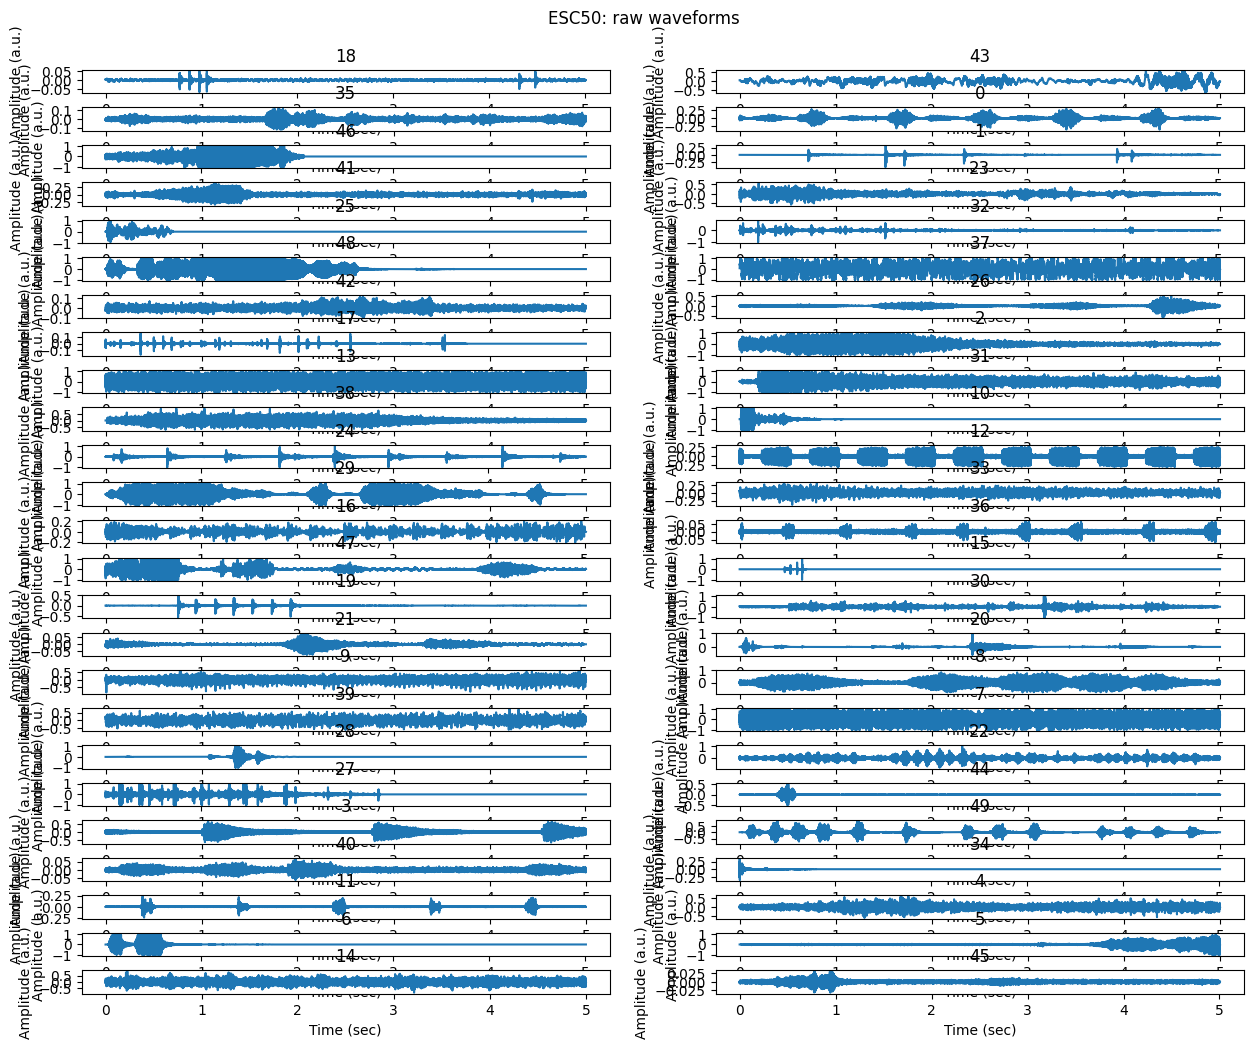

In [11]:
dataset_waves = dp.ESC50Prep(PATH, 'cpu')
labels = dataset.class_mapping

    
n_rows = int((len(labels.keys()) / 2))

fig, axs = plt.subplots(nrows=n_rows, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.6)
fig.suptitle("ESC50: raw waveforms", y=0.93)

for idx, ax in zip(range(0, length, 40), axs.ravel()):
    waveform, sample_rate, label = dataset_waves[idx]
    
    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate
    ax.plot(time_axis, waveform[0])
    ax.set_title(label)
    ax.set_xlabel('Time (sec)')
    ax.set_ylabel('Amplitude (a.u.)')

plt.savefig("figures/ESC50 - unprocessed_raw_waveforms.png", bbox_inches='tight')

In [12]:
sample_rates = []
number_of_channels = []
number_of_samples = []
durations = []
for i in range(0,length):
    waveform, sample_rate, label = dataset[i]
    
    number_of_channels.append(waveform.shape[0])
    number_of_samples.append(waveform.shape[1])
    duration = waveform.shape[1] / sample_rate
    durations.append(duration)
    sample_rates.append(sample_rate)    

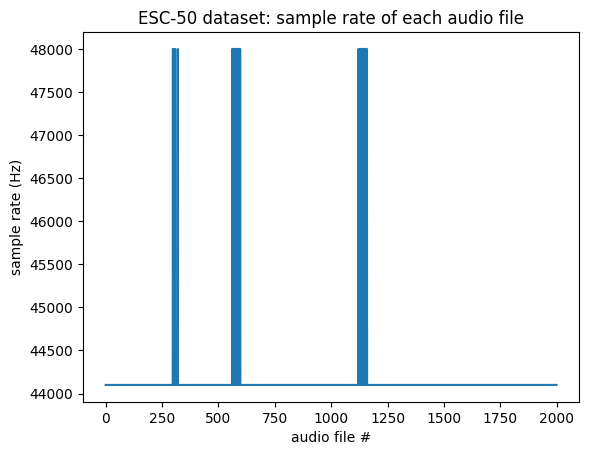

In [13]:
plt.figure()
plt.plot(sample_rates)
plt.xlabel("audio file #")
plt.ylabel("sample rate (Hz)")
plt.title("ESC-50 dataset: sample rate of each audio file")
plt.savefig("figures/ESC50 - sample_rates.png", bbox_inches='tight')

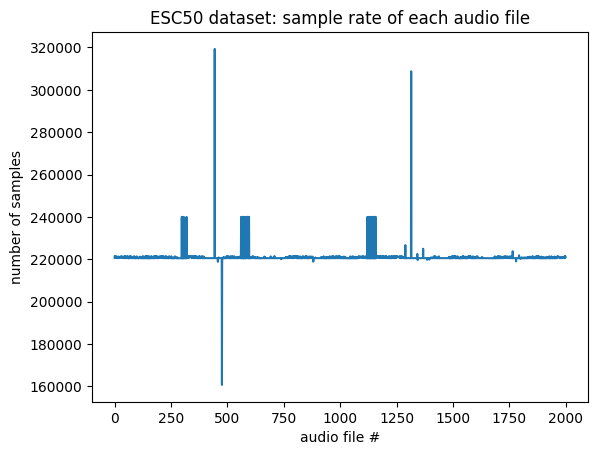

In [14]:
plt.figure()
plt.plot(number_of_samples)
plt.xlabel("audio file #")
plt.ylabel("number of samples")
plt.title("ESC50 dataset: sample rate of each audio file")
plt.savefig("figures/ESC50 - number_of_samples.png", bbox_inches='tight')

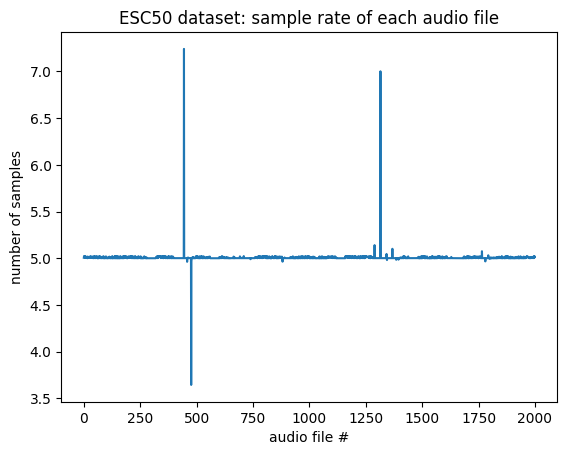

In [15]:
plt.figure()
plt.plot(durations)
plt.xlabel("audio file #")
plt.ylabel("number of samples")
plt.title("ESC50 dataset: sample rate of each audio file")
plt.savefig("figures/ESC50 - durations.png", bbox_inches='tight')

In [16]:
np.mean(number_of_samples)

221205.195

In [15]:
44100*5

220500

## Visualize the features

### Unprocessed raw waveforms

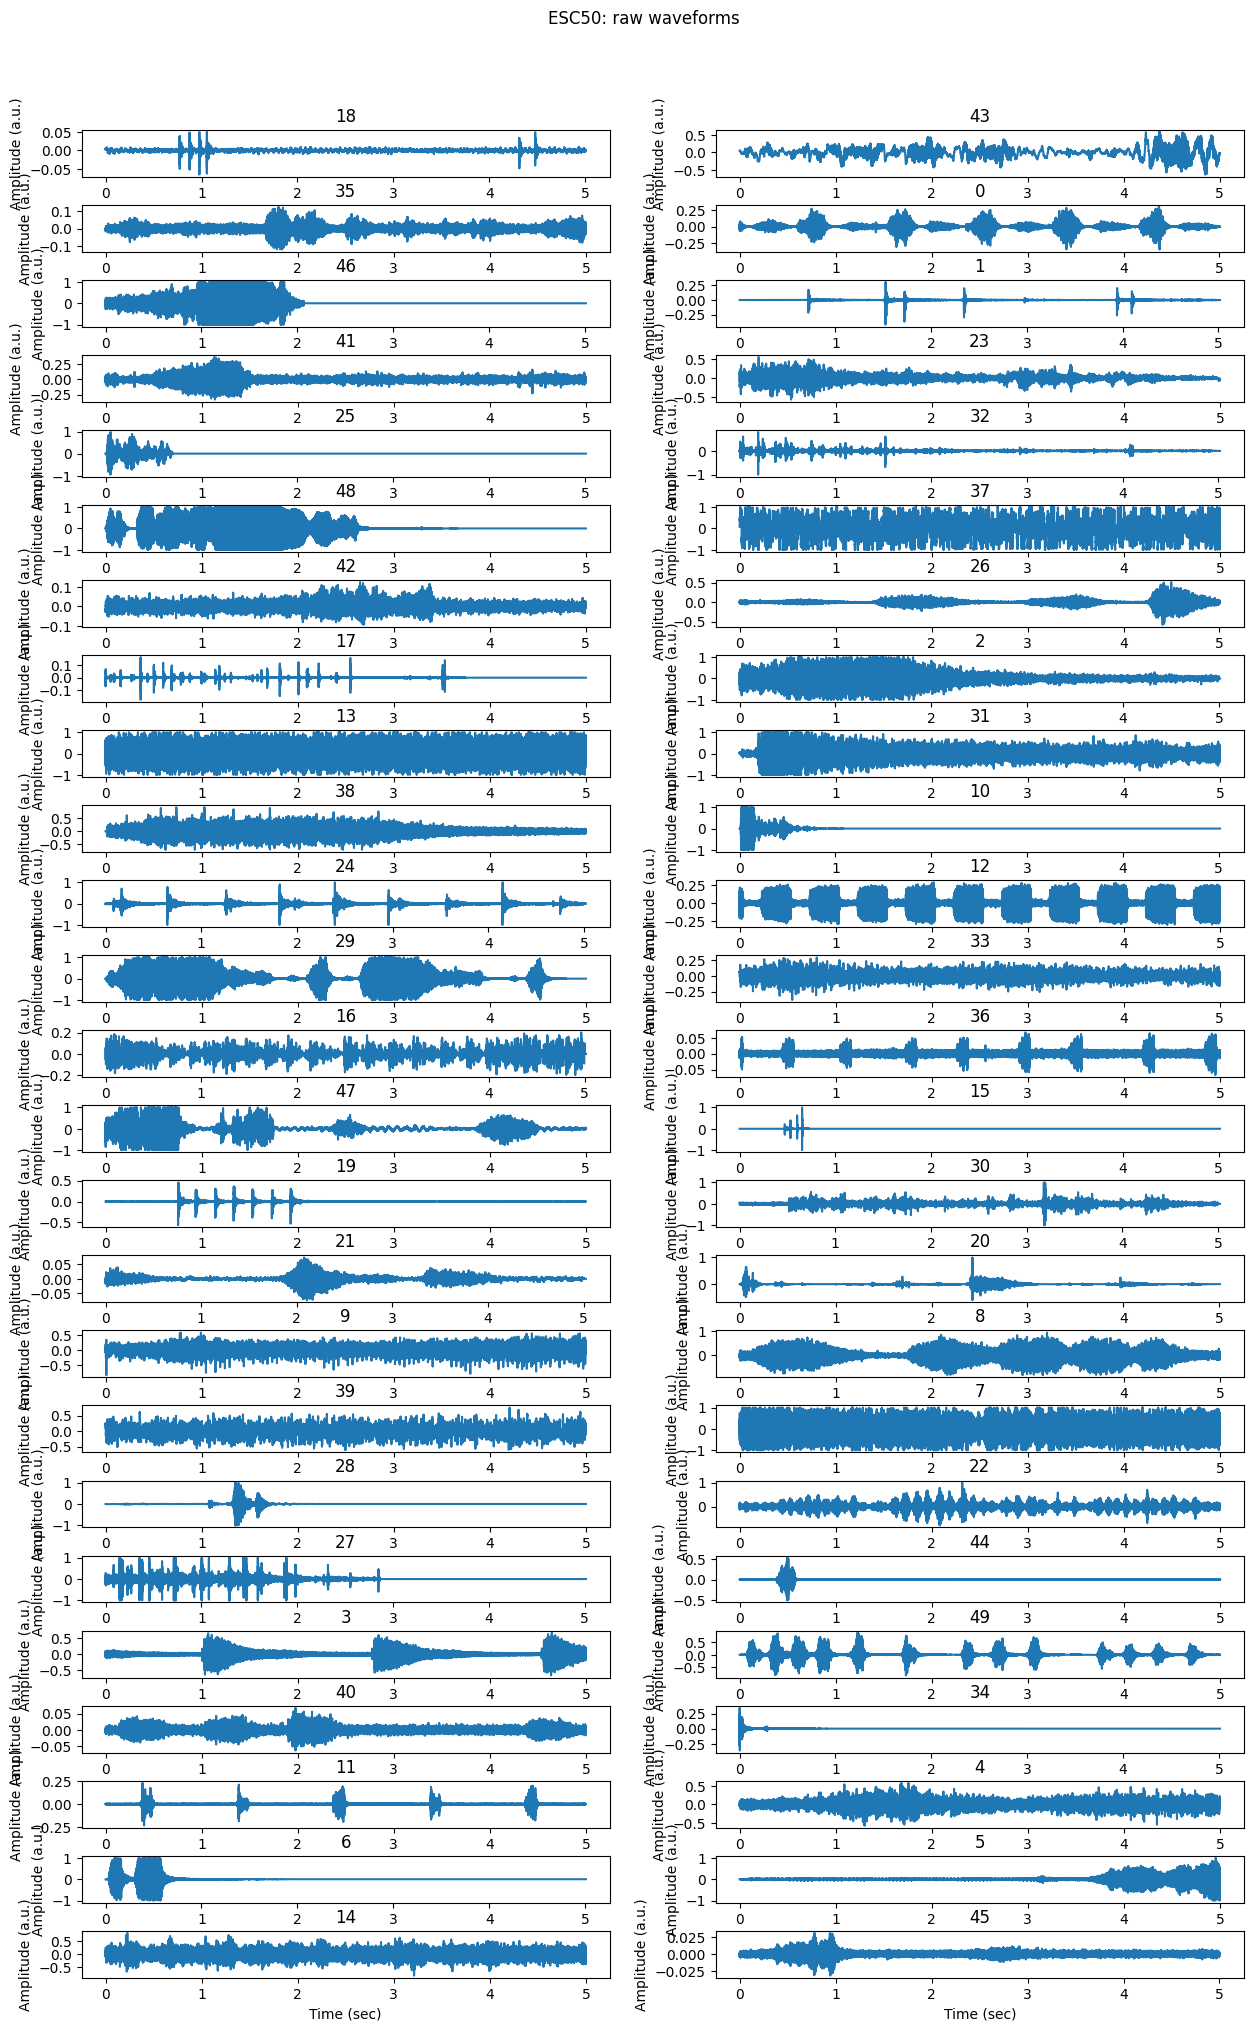

In [18]:
dataset_waves = dp.ESC50Prep(PATH, 'cpu')
labels = dataset_waves.class_mapping

    
n_rows = int((len(labels.keys()) / 2))

fig, axs = plt.subplots(nrows=n_rows, ncols=2, figsize=(15, 24))
plt.subplots_adjust(hspace=0.6)
fig.suptitle("ESC50: raw waveforms", y=0.93)

for idx, ax in zip(range(0, length, 40), axs.ravel()):
    waveform, sample_rate, label = dataset_waves[idx]
    
    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate
    ax.plot(time_axis, waveform[0])
    ax.set_title(label)
    ax.set_xlabel('Time (sec)')
    ax.set_ylabel('Amplitude (a.u.)')

plt.savefig("figures/ESC50-unprocessed_raw_waveforms.png", bbox_inches='tight')

In [19]:
RESAMPLE_RATE = 44100
NUMBER_OF_SAMPLES = 110250

### Processed waveforms

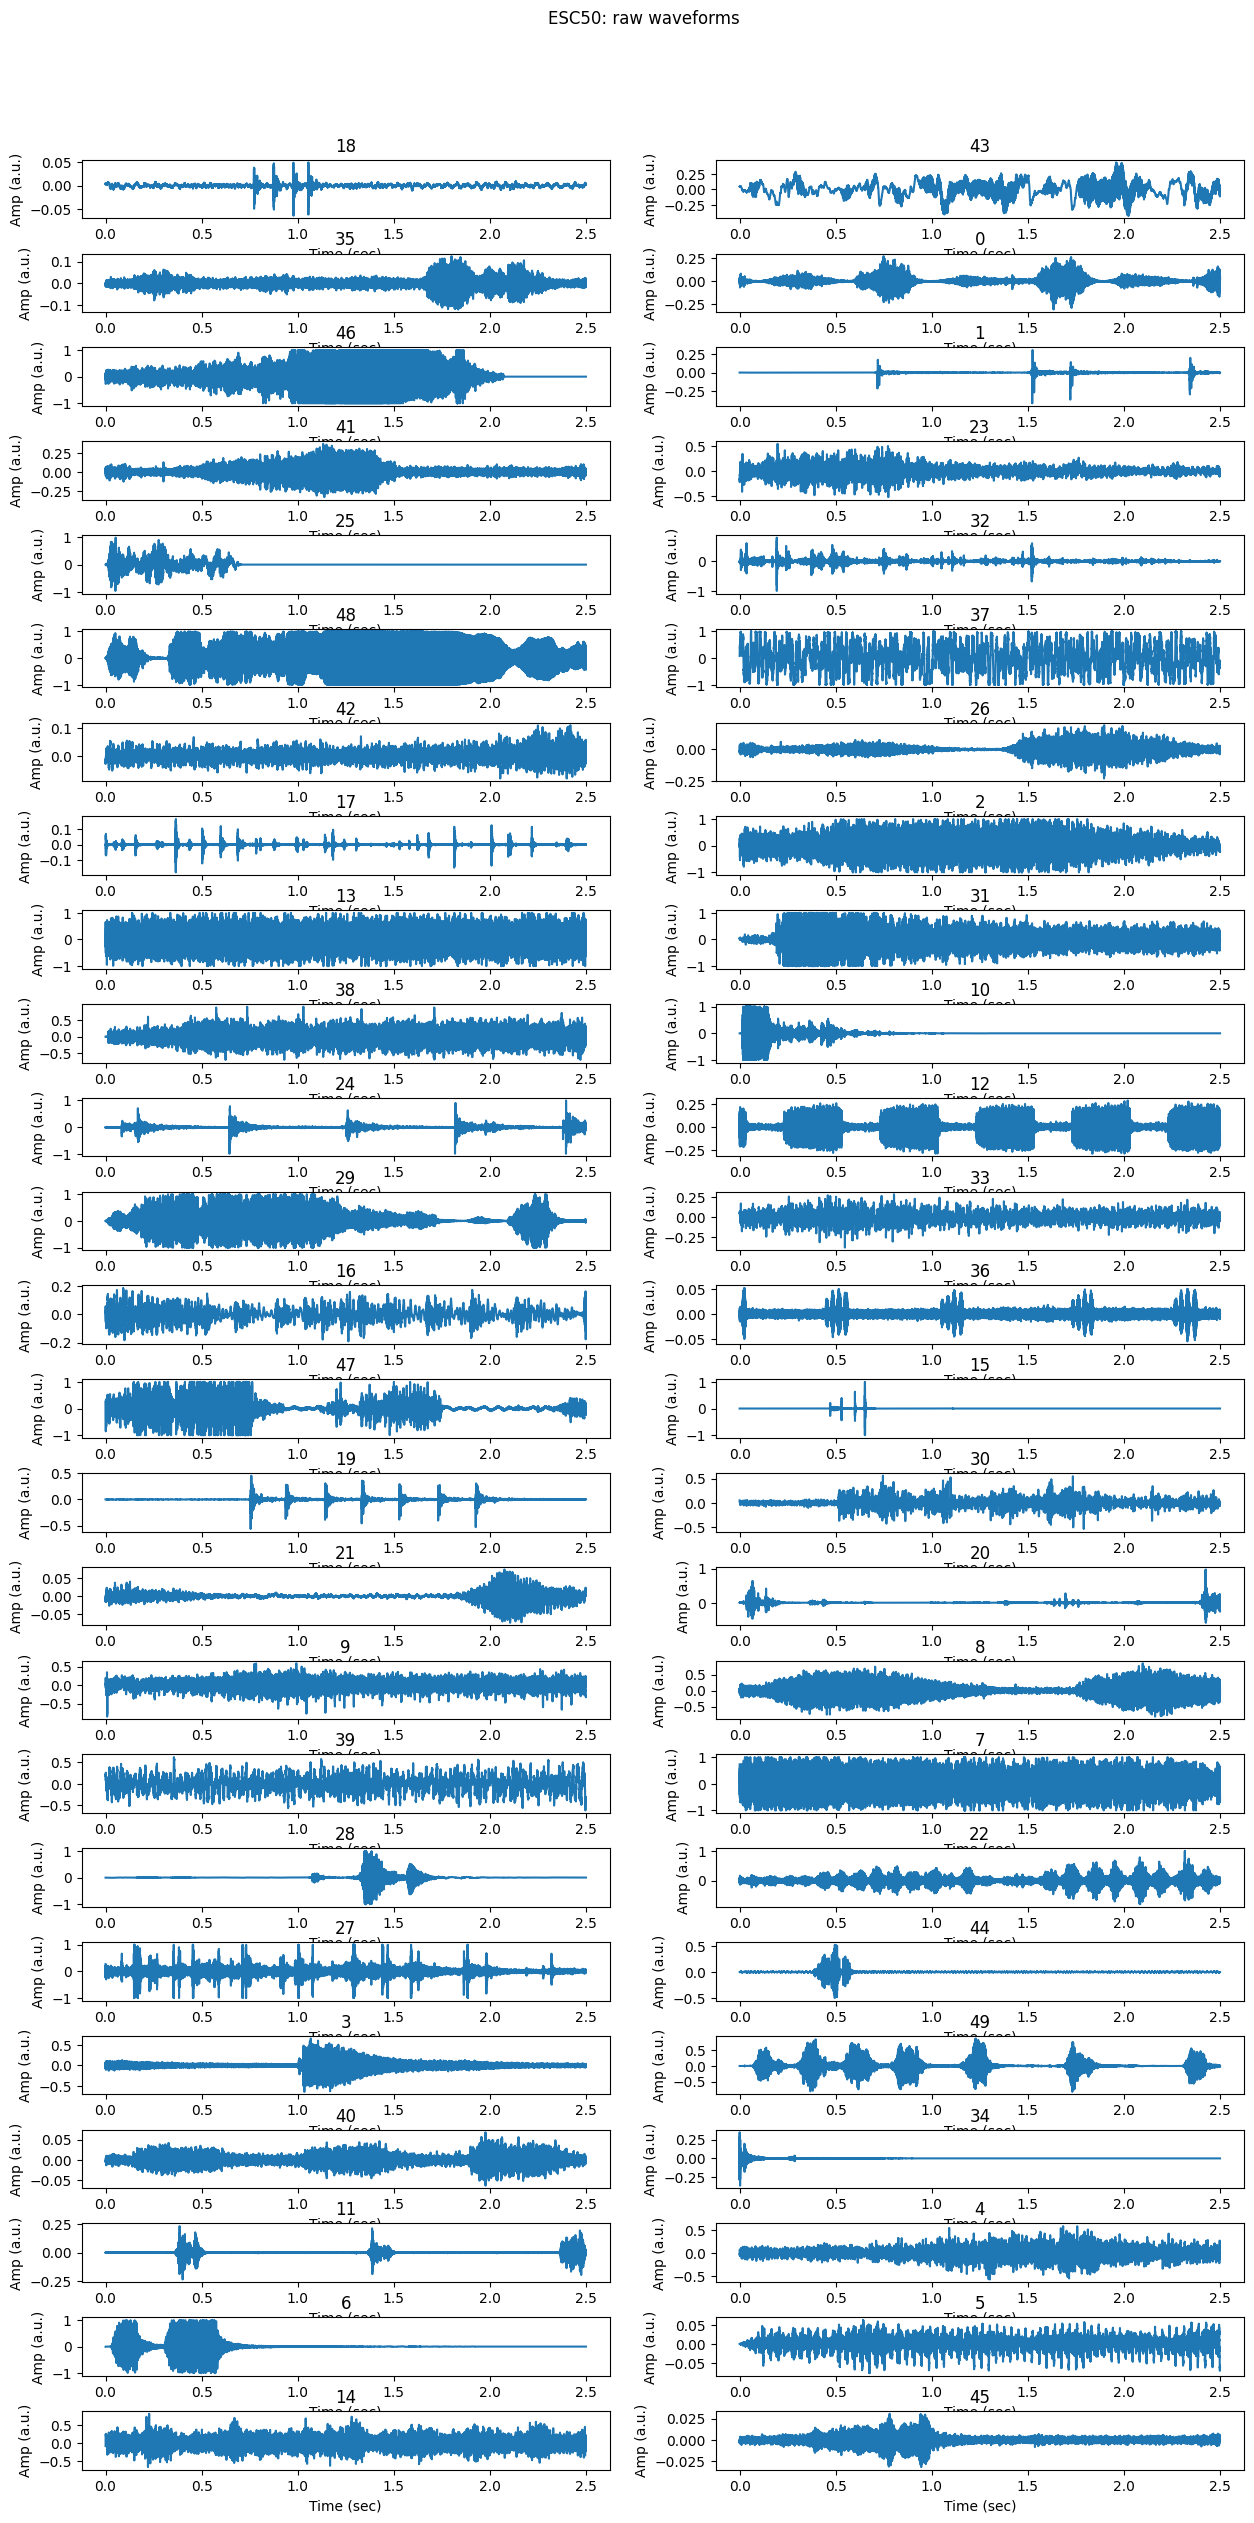

In [22]:
dataset_waves = dp.ESC50Prep(PATH, 'cpu', preprocess=True, resample_rate=RESAMPLE_RATE, number_of_samples=NUMBER_OF_SAMPLES)
labels = dataset.class_mapping

    
n_rows = int((len(labels.keys()) / 2))

fig, axs = plt.subplots(nrows=n_rows, ncols=2, figsize=(15, 30))
plt.subplots_adjust(hspace=0.6)
fig.suptitle("ESC50: raw waveforms", y=0.93)

for idx, ax in zip(range(0, length, 40), axs.ravel()):
    waveform, sample_rate, label = dataset_waves[idx]
    
    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate
    ax.plot(time_axis, waveform[0])
    ax.set_title(label)
    ax.set_xlabel('Time (sec)')
    ax.set_ylabel('Amp (a.u.)')

plt.savefig("figures/ESC50-processed_raw_waveforms.png", bbox_inches='tight')

## Plot Melspectrograms

In [23]:
n_fft = 1024
win_length = None
hop_length = 512
n_mels = 64

mel_spectrogram = T.MelSpectrogram(
    sample_rate=RESAMPLE_RATE,
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
    norm='slaney',
    onesided=True,
    n_mels=n_mels,
    mel_scale="htk",
)


dataset_melspecs = dp.ESC50Prep(PATH, 'cpu', preprocess=True, transform=mel_spectrogram, resample_rate=RESAMPLE_RATE, number_of_samples=NUMBER_OF_SAMPLES)


/var/folders/65/wgxws1gj2xn1xy2ldz53_4dh0000gn/T/ipykernel_58750/3385637856.py:17: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout(pad=5.0)


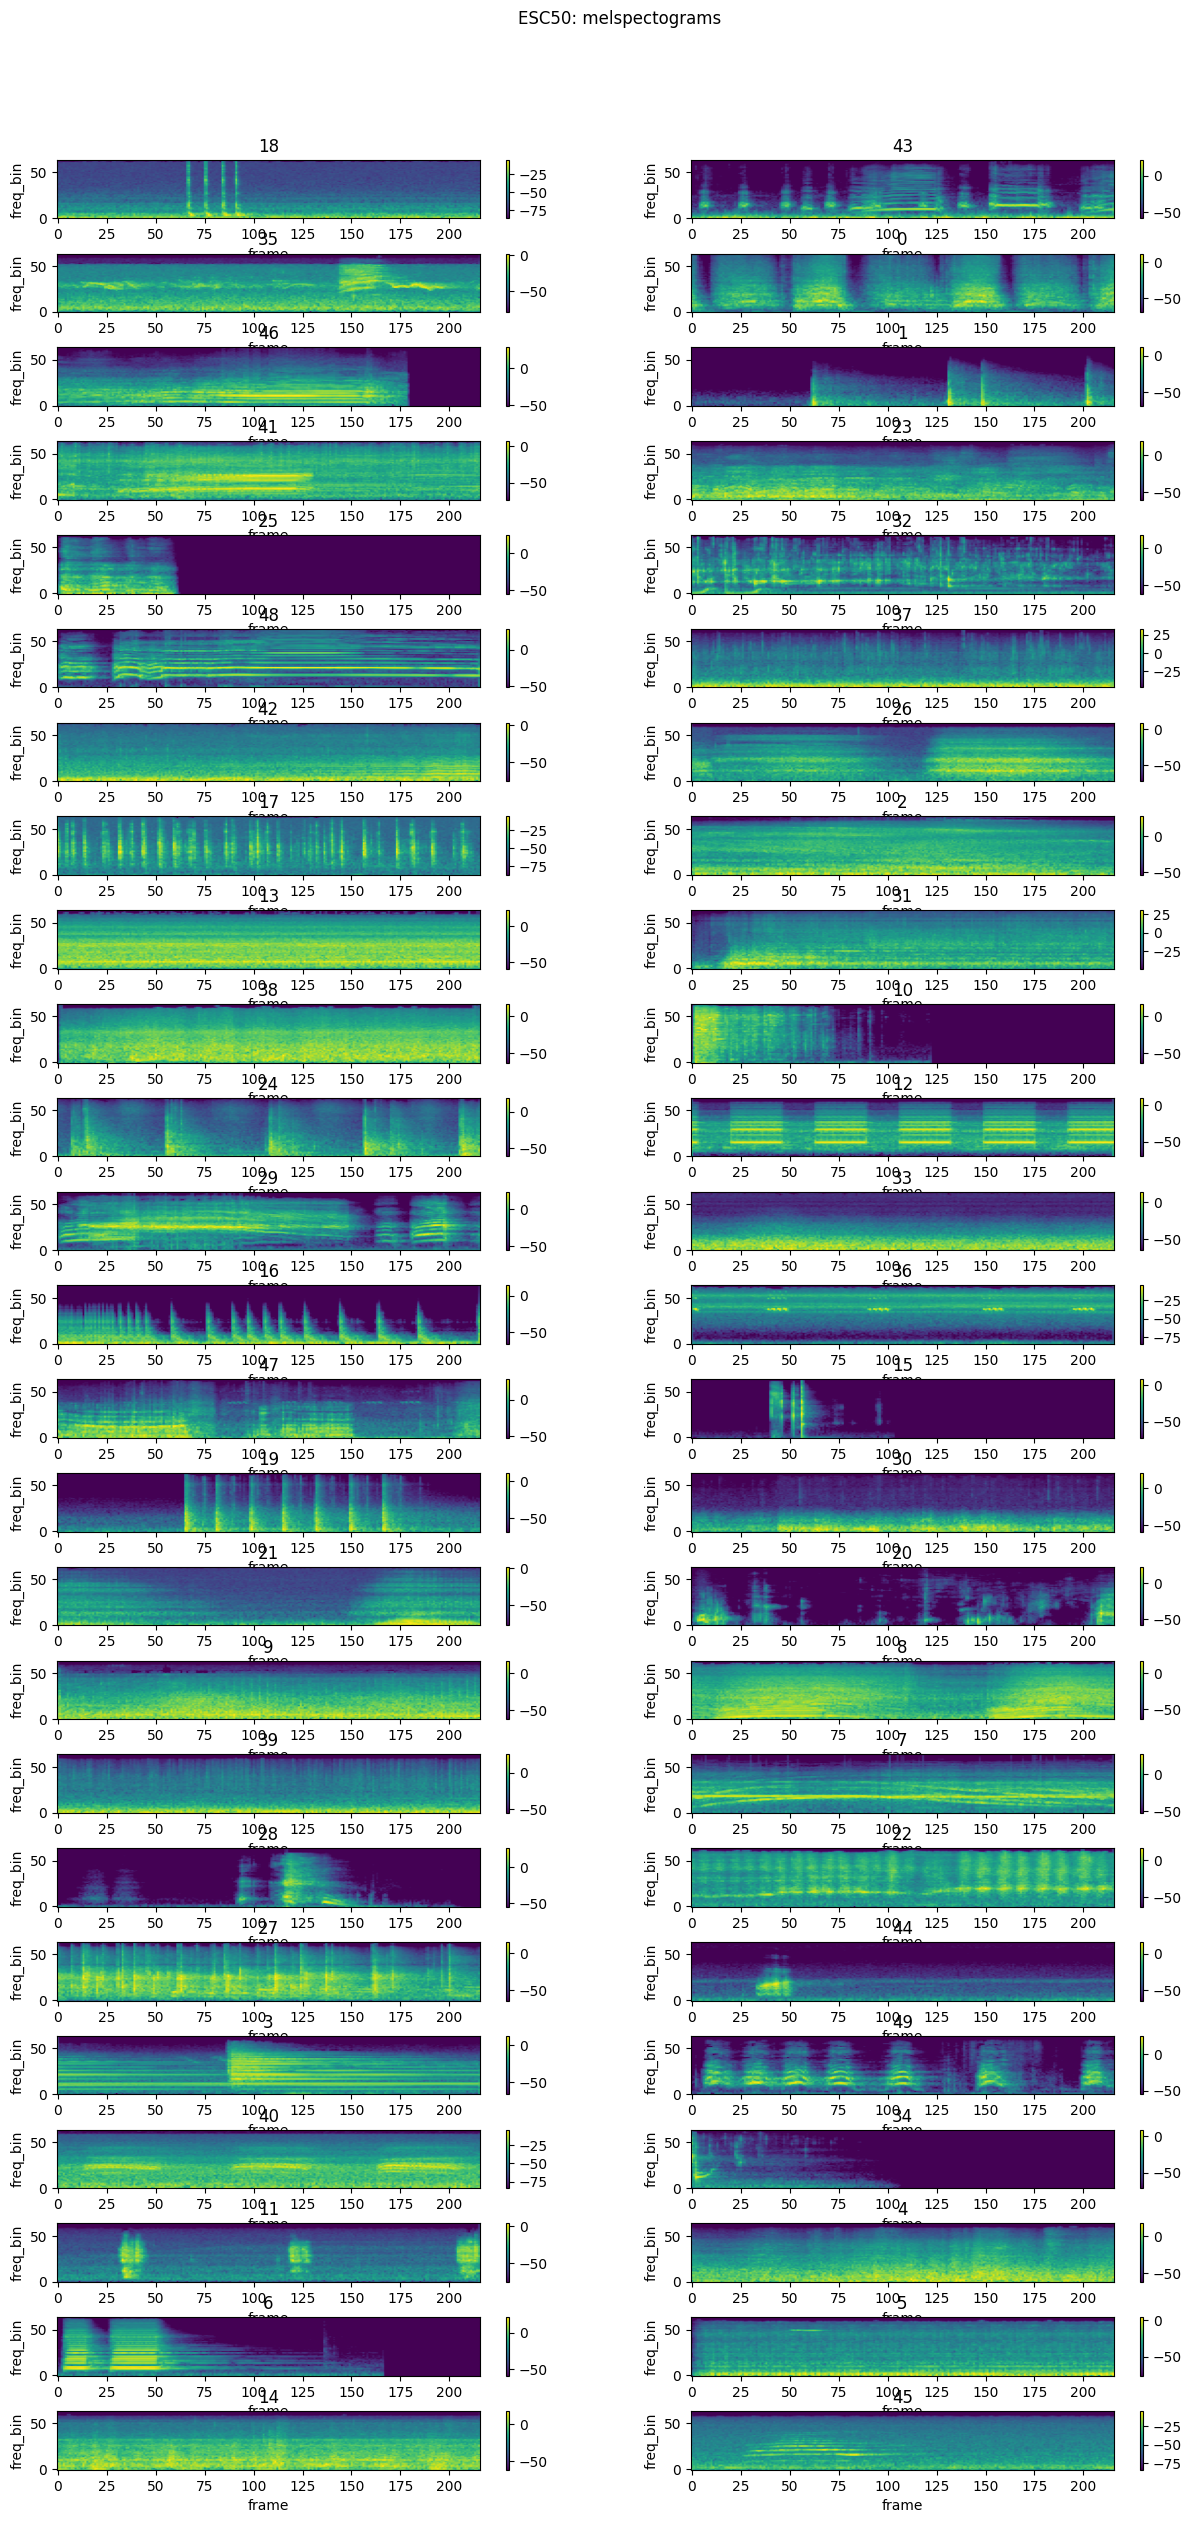

In [26]:
n_rows = int((len(labels.keys()) / 2))

fig, axs = plt.subplots(nrows=n_rows, ncols=2, figsize=(15, 30))
plt.subplots_adjust(hspace=0.6)
fig.suptitle("ESC50: melspectograms", y=0.93)

for idx, ax in zip(range(0, length, 40), axs.ravel()):
    waveform, sample_rate, label = dataset_melspecs[idx]
            
    im = ax.imshow(librosa.power_to_db(waveform[0]), origin="lower", aspect="auto")
    fig.colorbar(im, ax=ax)

    ax.set_title(label)
    ax.set_xlabel('frame')
    ax.set_ylabel('freq_bin')

plt.savefig("figures/ESC50-processed_melspecs.png", bbox_inches='tight')

## Plot MFCCs


In [27]:
n_fft = 2048
win_length = None
hop_length = 512
n_mels = 128
n_mfcc = 13

mfcc_transform = T.MFCC(
    sample_rate=sample_rate,
    n_mfcc=n_mfcc,
    melkwargs={
      'n_fft': n_fft,
      'n_mels': n_mels,
      'hop_length': hop_length,
      'mel_scale': 'htk',
    }
)

dataset_mfcc = dp.ESC50Prep(PATH, 'cpu', preprocess=True, transform=mfcc_transform, resample_rate=RESAMPLE_RATE, number_of_samples=NUMBER_OF_SAMPLES)


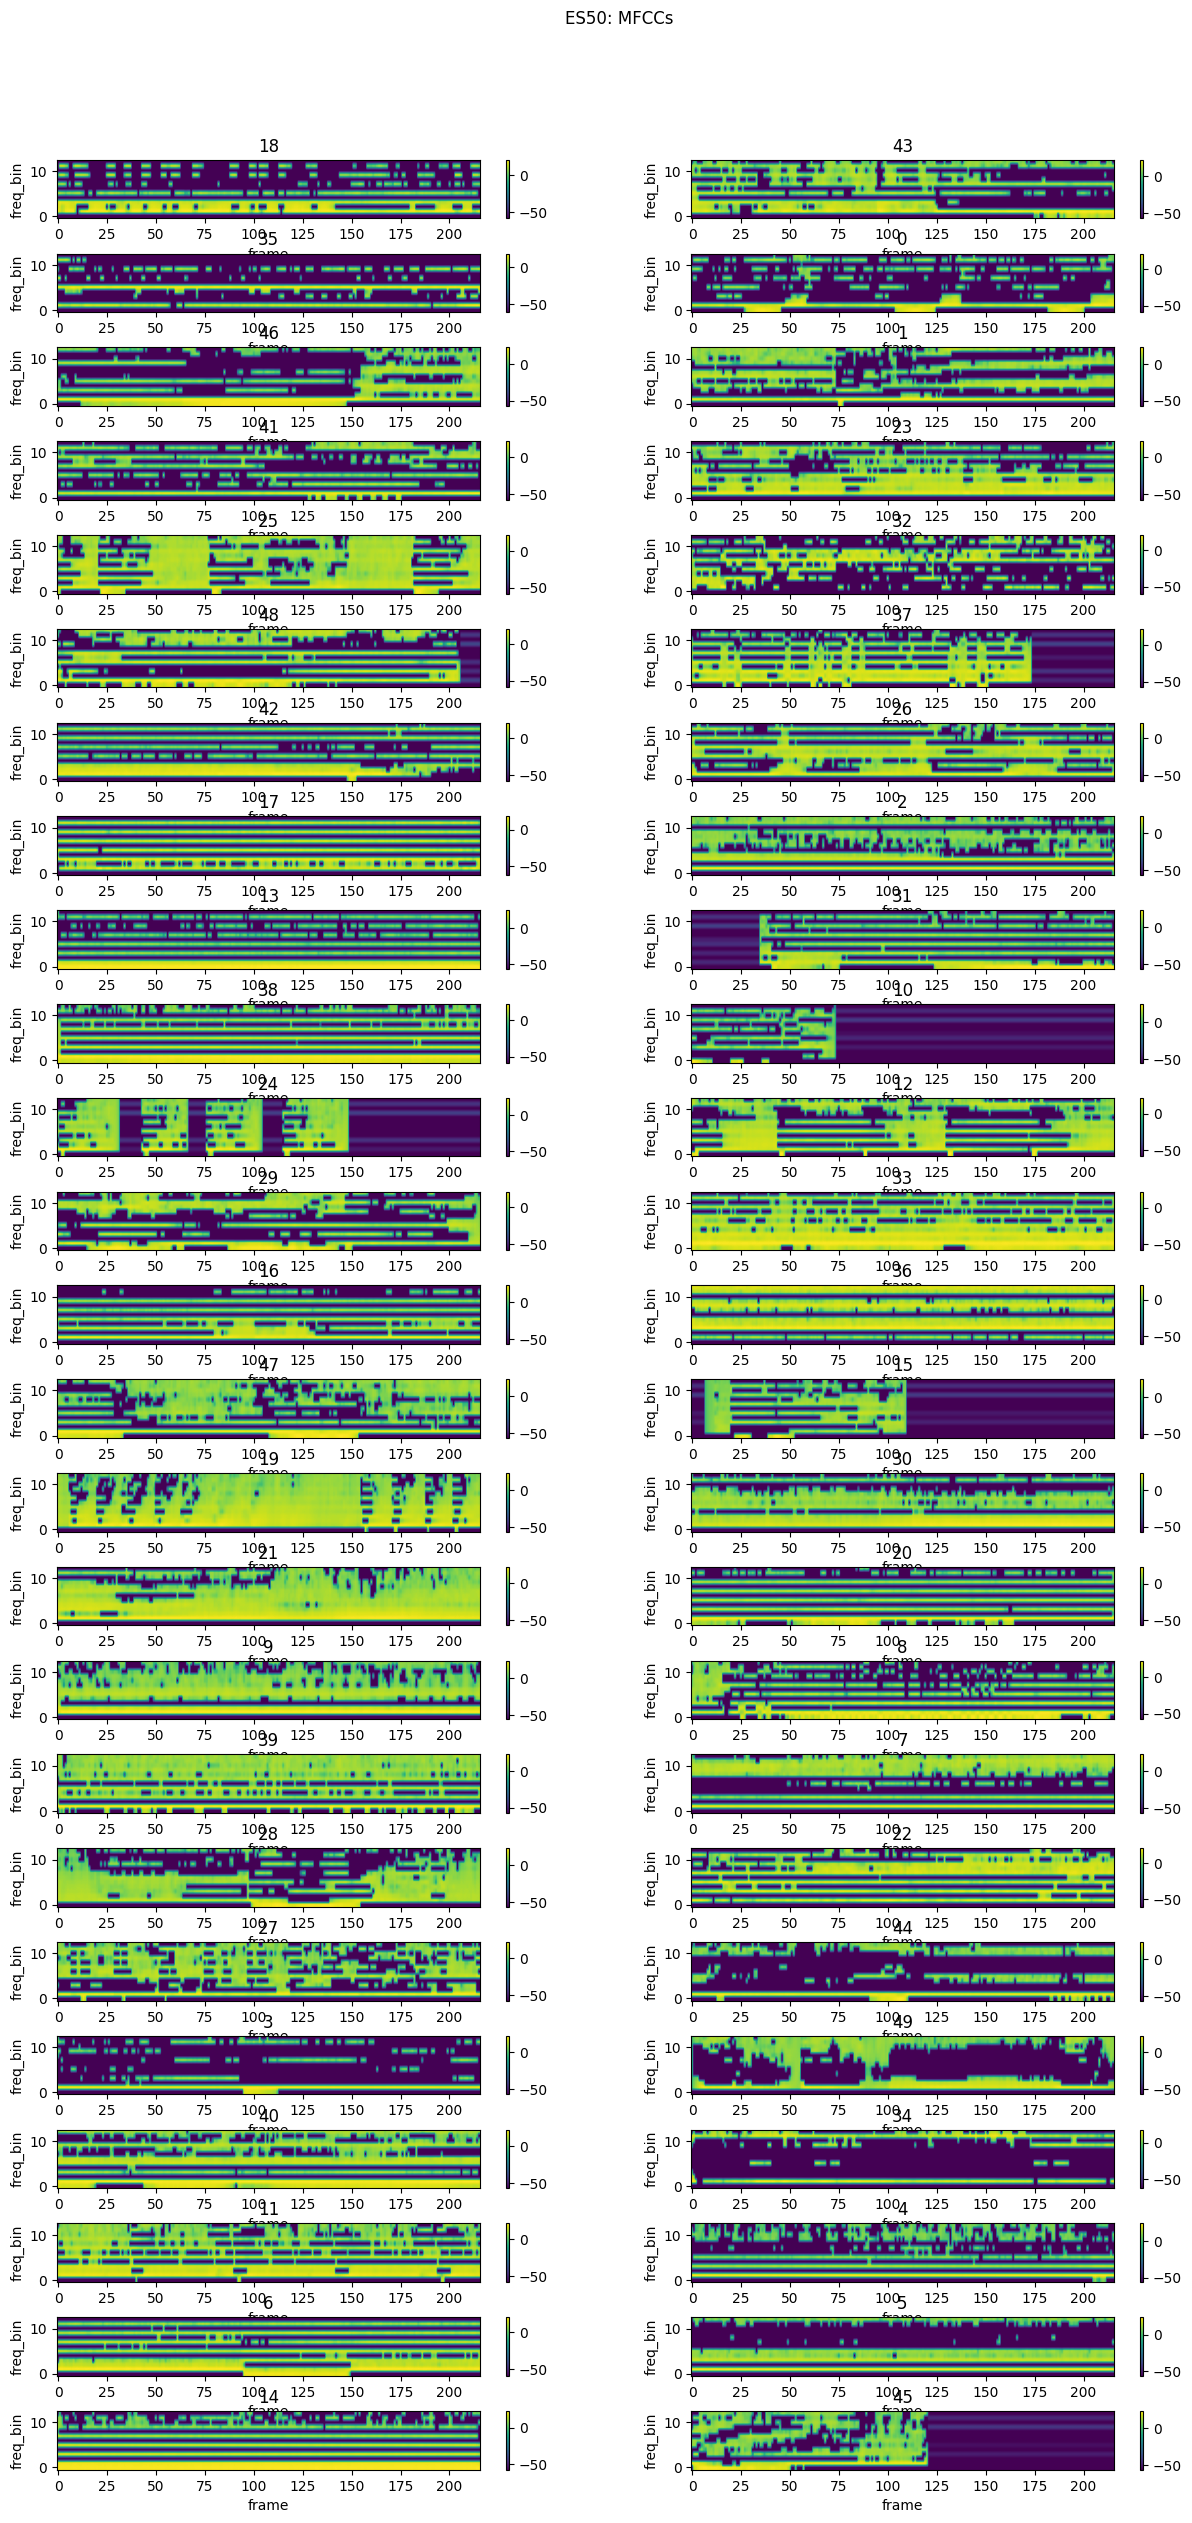

In [28]:
n_rows = int((len(labels.keys()) / 2))

fig, axs = plt.subplots(nrows=n_rows, ncols=2, figsize=(15, 30))
plt.subplots_adjust(hspace=0.6)
fig.suptitle("ES50: MFCCs", y=0.93)

for idx, ax in zip(range(1, length, 40), axs.ravel()):
    waveform, sample_rate, label = dataset_mfcc[idx]
            
    im = ax.imshow(librosa.power_to_db(waveform[0]), origin="lower", aspect="auto")
    fig.colorbar(im, ax=ax)

    ax.set_title(label)
    ax.set_xlabel('frame')
    ax.set_ylabel('freq_bin')

plt.savefig("figures/ESC50-processed_mfcc.png", bbox_inches='tight')